#Introduction

A simple movies recommender system using movies dataset that are listed in the "MovieLens Latest Full Dataset" comprising of 26 million ratings on 45,000 movies from 27,000 users. Let us have a look at the Data that are available to us for data preprocessing and feature engineering.

In [0]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          18543  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          3MB  2019-07-05 09:58:02          12949  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16          14349  
chirin/africa-economic-banking-and-systemic-crisis-data  Africa Economic, Banking and Systemic Crisis Data   14KB  2019-07-21 02:00:17           6648  
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data     

In [0]:
!kaggle datasets list -s movies

ref                                                  title                                              size  lastUpdated          downloadCount  
---------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
rounakbanik/the-movies-dataset                       The Movies Dataset                                228MB  2017-11-10 02:40:38          70473  
orgesleka/imdbmovies                                 IMDB Movies Dataset                               783KB  2016-11-15 14:32:10          11063  
tmdb/tmdb-movie-metadata                             TMDB 5000 Movie Dataset                             9MB  2017-09-28 01:09:12         108240  
stephanerappeneau/350-000-movies-from-themoviedborg  350 000+ movies from themoviedb.org                67MB  2017-10-12 19:49:17           3266  
jrobischon/wikipedia-movie-plots                     Wikipedia Movie Plots                              30MB  2018-10-

In [0]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

 92% 210M/228M [00:02<00:00, 66.9MB/s]
100% 228M/228M [00:02<00:00, 80.3MB/s]


In [0]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from zipfile import ZipFile

#DataPreprecessing

unzip multiple csv file in 'the-movies-dataset.zip' to 'temp_csv' file .

In [0]:
with ZipFile('/content/the-movies-dataset.zip', 'r') as zipObj:
   # Get a list of all archived file names from the zip
   listOfFileNames = zipObj.namelist()
   # Iterate over the file names
   for fileName in listOfFileNames:
       # Check filename endswith csv
       if fileName.endswith('.csv'):
           # Extract a single file from zip
           zipObj.extract(fileName, 'temp_csv')

read each of the csv file in 'temp_csv' to separate variable.

In [0]:
credit=pd.read_csv('/content/temp_csv/credits.csv',header=0,sep=',',quotechar='"')
keywords=pd.read_csv('/content/temp_csv/keywords.csv',header=0,sep=',',quotechar='"')
links=pd.read_csv('/content/temp_csv/links.csv')
links_small=pd.read_csv('/content/temp_csv/links_small.csv',header=0,sep=',',quotechar='"')
movies_metadata=pd.read_csv('/content/temp_csv/movies_metadata.csv',header=0,sep=',',quotechar='"')
ratings=pd.read_csv('/content/temp_csv/ratings.csv',header=0,sep=',',quotechar='"')
ratings_small=pd.read_csv('/content/temp_csv/ratings_small.csv',header=0,sep=',',quotechar='"')

In [0]:
movies_metadata.shape

(45466, 24)

In [0]:
movies_metadata.head().transpose() # let's have a brief look at 24 features of movies_metadata.

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [0]:
movies_metadata.columns  #name of columns in movies_metadata

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [0]:
movies_metadata.info() # info of movies_metadata dataset data_type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [0]:
#'title' and 'original_title' looks-alike ,let's examine it.
movies_metadata[movies_metadata['original_title']!=movies_metadata['title']][['title','original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


'original_title':Title of the movie in native language.         
'title':Translated name in english,so it is readable by everyone.   

*drop 'original_title' and keep 'title' feature as 
there is no loss of information in doing so.


In [0]:
movies_metadata=movies_metadata.drop('original_title',axis=1) #drop 'original_title' column from movies_ metadata

In [0]:
#also there will be no use of 'imdb_id' so we can remove it.
movies_metadata=movies_metadata.drop('imdb_id',axis=1)

In [0]:
#'revenue' in movies_metadata have lots value is zero.
movies_metadata[movies_metadata['revenue']==0].shape

(38052, 22)

out of 45000 row in 'revenue' column, 38000 is zeros that means we have no information of the total revenue collected by the movie . but we still use revenue as an important feature as more the revenue more popular the movie.
so,we will convert the zero in 'revenue' with null.

In [0]:
movies_metadata['revenue']=movies_metadata['revenue'].replace(0,np.nan) #convert 

In [0]:
#Budget feature is object type due to some useless data ,so we have to convert those unclean data into numeric variable and replace all the non-numeric values with NaN. 
movies_metadata['budget']=pd.to_numeric(movies_metadata['budget'],errors='coerce')
movies_metadata['budget']=movies_metadata['budget'].replace(0,np.nan)
movies_metadata[movies_metadata['budget'].isnull()].shape

(36576, 22)

As we already discussed that revenue and budget plays as a very important feature,as if the ratio of revenue to budget will be greater than 1 then it indicate profit whereas a return of less than 1 will indicate loss.

In [0]:
#'earning' column will show whether the movies will be in profit or loss.

movies_metadata['earnings']=movies_metadata['revenue']/movies_metadata['budget']
movies_metadata[movies_metadata['earnings'].isnull()].shape

(40085, 23)

We have only around 5000 movies data for which we have revenue and budget ratio.

'release_date' gives the date on which the movie was released , then we can extract the year in which the movie was released as a broad and efficient division which will we a valuable categorical feature.

In [0]:
movies_metadata['year']=pd.to_datetime(movies_metadata['release_date'],errors='coerce').apply(lambda x:str(x).split('-')[0] if x!=np.nan else np.nan)

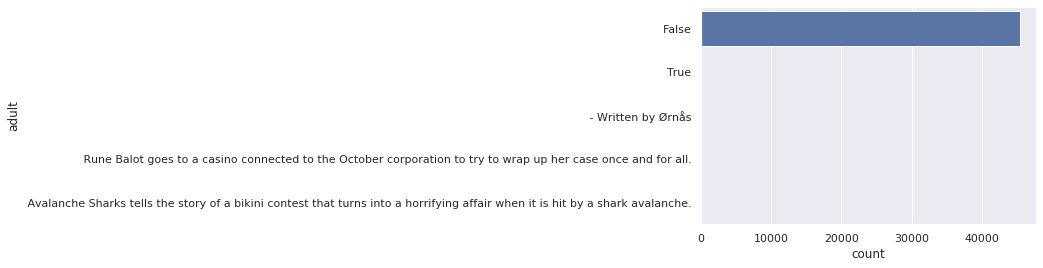

In [0]:
sns.set(style="darkgrid")
ax = sns.countplot(y="adult", data=movies_metadata)

from the count_plot there are approximately zero adult movies in the dataset.

In [0]:
#drop the 'adult' feature.
movies_metadata=movies_metadata.drop('adult',axis=1)

In [0]:
movies_metadata.head().transpose()

,0,1,2,3,4
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,3e+07,6.5e+07,NaN,1.6e+07,NaN
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
original_language,en,en,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
popularity,21.9469,17.0155,11.7129,3.85949,8.38752
poster_path,<img src='http://image.tmdb.org/t/p/w185//rhIR...,<img src='http://image.tmdb.org/t/p/w185//vzmL...,<img src='http://image.tmdb.org/t/p/w185//6ksm...,<img src='http://image.tmdb.org/t/p/w185//16XO...,<img src='http://image.tmdb.org/t/p/w185//e64s...
production_companies,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'name': 'Sandollar Productions', 'id': 5842}..."
